In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/koreahousedata/Daegu_Real_Estate_data.csv


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
korea_apartment_data = pd.read_csv('/kaggle/input/koreahousedata/Daegu_Real_Estate_data.csv')
korea_apartment_data

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(korea_apartment_data, test_size=0.25, random_state=42) #3/4 training and 1/4 testing

# Data Cleaning Phase

In [4]:
X_train.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'HallwayType', 'HeatingType', 'AptManageType', 'N_Parkinglot(Ground)',
       'N_Parkinglot(Basement)', 'TimeToBusStop', 'TimeToSubway', 'N_APT',
       'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)'],
      dtype='object')

In [5]:
lst = []
for column in X_train.columns:
    if 0 in X_train[column]:
        lst.append(column)

In [6]:
X_train.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


It appears that there are no null values in any of the columns of the dataframe. Since there are no null values to pay attention to, the data cleaning phase is complete.

# Exploratory Data Analysis Phase

In [7]:
[type(X_train[column].iloc[0]) for column in X_train.columns]

[numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 str,
 str,
 str,
 numpy.float64,
 numpy.float64,
 str,
 str,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 str,
 numpy.float64,
 numpy.int64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 numpy.int64,
 numpy.float64,
 numpy.float64]

It appears that most of these columns are quantitative discrete/quantitative continuous.

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.]),
 <a list of 9 Text xticklabel objects>)

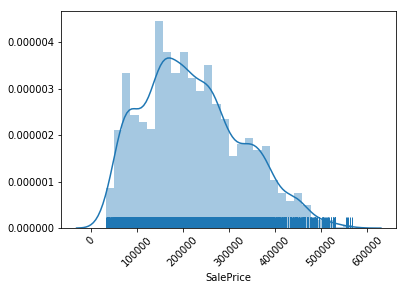

In [8]:
sns.distplot(X_train['SalePrice'], kde = True, rug = True)
plt.xticks(rotation= 45)

This distribution of sale prices is unimodal and skewed to the right(skewed towards higher numbers of sale prices).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

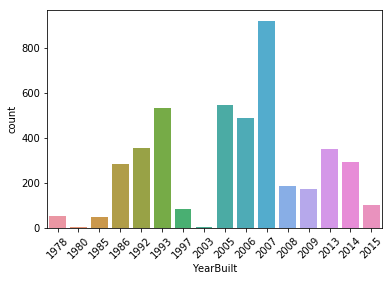

In [9]:
sns.countplot(X_train['YearBuilt'])
plt.xticks(rotation= 45)

It appears that the number of houses built in korea per year seem to increase from 1985 to 1993, and back down again until 2005. There was a slight dip in houses built from 2005 to 2006. Then there was a large spike in 2007, and the count crashed down before 2008(potentially because of the great recession). Then, there's a slight increase from 2008 to 2013, back down in 2015.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

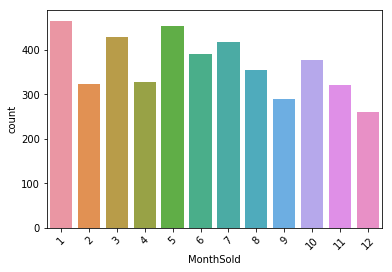

In [10]:
sns.countplot(X_train['MonthSold'])
plt.xticks(rotation= 45)

It appears months towards the beginning of the year(indicated by lower numbers) have higher counts.

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 8 Text xticklabel objects>)

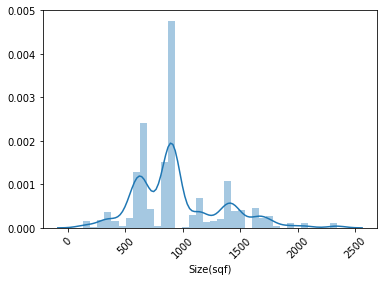

In [11]:
sns.distplot(X_train['Size(sqf)'])
plt.xticks(rotation= 45)

The distribution of square footage of houses appears to be unimodal, and skewed to the right(skewed towards higher square foot numbers). There are many gaps in square footage values.

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text xticklabel objects>)

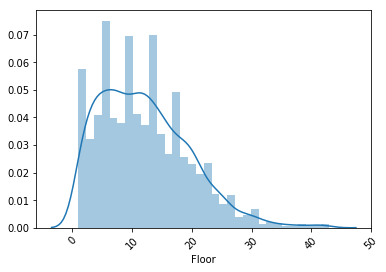

In [12]:
sns.distplot(X_train['Floor'])
plt.xticks(rotation= 45)

The distribution of the floor locations of apartment units is multimodal, and skewed to the right(higher values of Floor).

In [13]:
print(X_train['HallwayType'].value_counts())
avg_price_per_hallway_type = X_train[['HallwayType', 'SalePrice']].groupby('HallwayType', as_index = False).agg(np.mean)
avg_price_per_hallway_type

terraced    2646
mixed       1276
corridor     496
Name: HallwayType, dtype: int64


,HallwayType,SalePrice
0,corridor,88628.026210
1,mixed,156239.763323
2,terraced,277004.234694


It appears that the average price of apartments with the terraced hallway type is higher than the average price of apartments with mixed and corridor hallway types respectively.

There are three different types of hallway types: terraced, mixed, and corridor. 

In [14]:
print(X_train['AptManageType'].value_counts())
avg_price_per_manage_type = X_train[['AptManageType', 'SalePrice']].groupby('AptManageType', as_index = False).agg(np.mean)
avg_price_per_manage_type

management_in_trust    4161
self_management         257
Name: AptManageType, dtype: int64


,AptManageType,SalePrice
0,management_in_trust,227228.433790
1,self_management,119755.373541


In [15]:
korea_apartment_data.columns

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'HallwayType', 'HeatingType', 'AptManageType', 'N_Parkinglot(Ground)',
       'N_Parkinglot(Basement)', 'TimeToBusStop', 'TimeToSubway', 'N_APT',
       'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)'],
      dtype='object')

Value counts for multiple quantitative discrete variables.

In [16]:
print(X_train['N_FacilitiesNearBy(Mall)'].value_counts())
avg_price_per_mall_facilities = X_train[['N_FacilitiesNearBy(Mall)', 'SalePrice']].groupby('N_FacilitiesNearBy(Mall)', as_index = False).agg(np.mean)
avg_price_per_mall_facilities

1.0    3695
0.0     488
2.0     235
Name: N_FacilitiesNearBy(Mall), dtype: int64


,N_FacilitiesNearBy(Mall),SalePrice
0,0.0,213099.137295
1,1.0,218919.951286
2,2.0,269672.531915


In [17]:
X_train['N_FacilitiesNearBy(ETC)'].value_counts()

0.0    1934
5.0    1469
1.0     681
2.0     334
Name: N_FacilitiesNearBy(ETC), dtype: int64

In [18]:
X_train['N_FacilitiesNearBy(Park)'].value_counts()

0.0    1989
1.0    1979
2.0     450
Name: N_FacilitiesNearBy(Park), dtype: int64

In [19]:
X_train['N_SchoolNearBy(Elementary)'].value_counts()

3.0    1557
4.0    1475
2.0    1239
0.0      89
6.0      58
Name: N_SchoolNearBy(Elementary), dtype: int64

In [20]:
X_train['N_SchoolNearBy(Middle)'].value_counts()

3.0    1859
2.0    1070
1.0     769
4.0     543
0.0     177
Name: N_SchoolNearBy(Middle), dtype: int64

In [21]:
X_train['N_SchoolNearBy(High)'].value_counts()

2.0    1426
1.0     991
5.0     926
4.0     657
3.0     241
0.0     177
Name: N_SchoolNearBy(High), dtype: int64

In [22]:
X_train['N_SchoolNearBy(University)'].value_counts()

2.0    1428
5.0     926
1.0     875
4.0     657
3.0     436
0.0      96
Name: N_SchoolNearBy(University), dtype: int64

In [23]:
X_train['N_FacilitiesInApt'].value_counts()

4     1105
7      907
5      872
10     585
3      516
8      186
9      153
2       53
1       41
Name: N_FacilitiesInApt, dtype: int64

In [24]:
X_train['N_FacilitiesNearBy(Total)'].value_counts()

9.0     1608
14.0     684
13.0     631
6.0      455
7.0      256
16.0     242
3.0      222
8.0      166
11.0      58
0.0       48
12.0      48
Name: N_FacilitiesNearBy(Total), dtype: int64

In [25]:
X_train['N_SchoolNearBy(Total)'].value_counts()

17.0    926
15.0    543
11.0    531
5.0     495
10.0    450
9.0     340
7.0     310
8.0     288
6.0     226
14.0    114
13.0     58
0.0      48
4.0      48
1.0      41
Name: N_SchoolNearBy(Total), dtype: int64

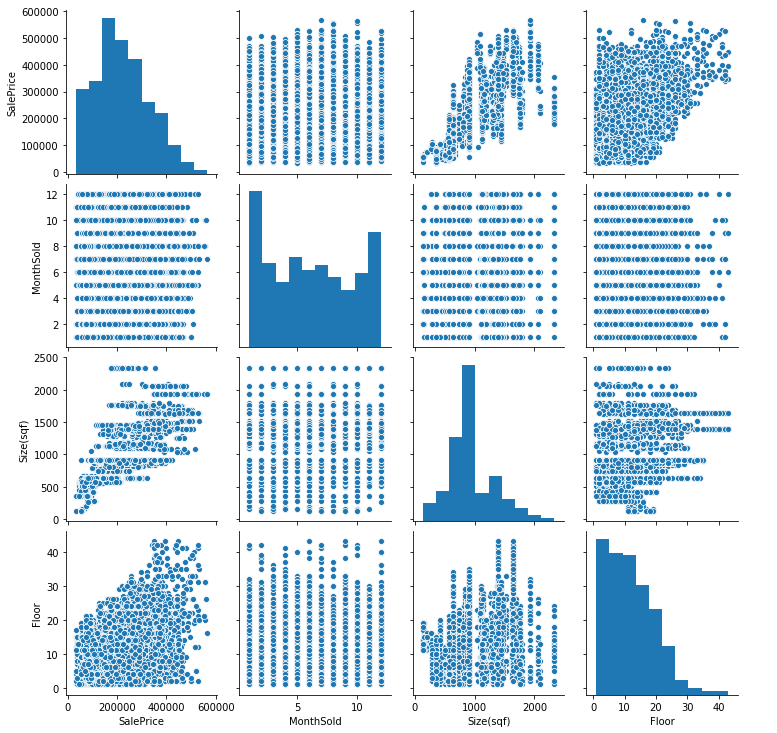

In [26]:
X_train_features = X_train[['SalePrice', 'MonthSold', 'Size(sqf)', 'Floor']]
sns.pairplot(X_train_features)

Based on this pairplot, there is a positive linear association between Size(sqf) and Sales Price. There is also a positive linear association between Floor and SalePrice. This means that Size(sqft) and Floor may be reliable predictors for Sales Price(even though there appears to be in heteroskedacity in the Sales Price versus Floor scatterplot). 

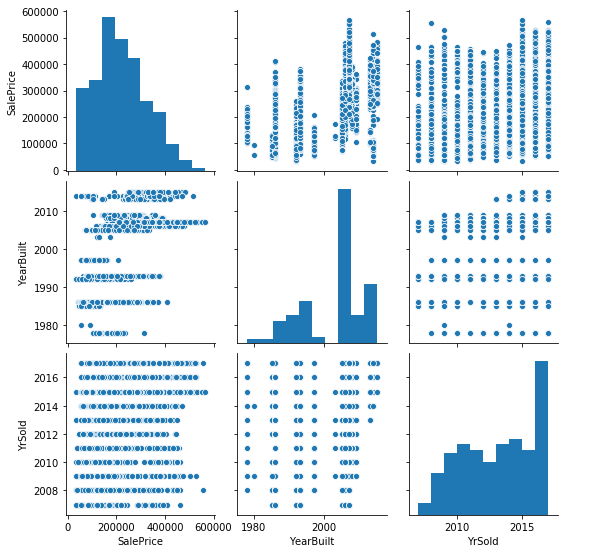

In [27]:
X_train_features2 = X_train[['SalePrice', 'YearBuilt', 'YrSold']]
sns.pairplot(X_train_features2)

In the scatterplot of SalesPrice versus YearBuilt, there appears to be a weak positive association between these two variables. That is why YearBuilt could be a reliable feature in predicting the label, Sale Price

In [28]:
X_train

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
415,230088,2006,2008,10,1149,12,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4382,271681,2006,2015,7,903,4,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
3159,338938,2007,2013,9,1643,14,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
4945,236725,2006,2016,6,636,6,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1730,142477,2005,2011,1,743,16,mixed,individual_heating,management_in_trust,67.0,...,1.0,5.0,0.0,3.0,4.0,4.0,4.0,7,13.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,176548,1993,2014,9,644,11,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
5191,274336,2009,2016,11,910,2,terraced,individual_heating,management_in_trust,25.0,...,0.0,2.0,1.0,2.0,1.0,1.0,1.0,5,6.0,5.0
5226,314159,2007,2016,11,1103,6,terraced,individual_heating,management_in_trust,554.0,...,2.0,0.0,1.0,2.0,2.0,2.0,2.0,4,9.0,8.0
5390,271681,2005,2017,3,914,14,mixed,individual_heating,management_in_trust,67.0,...,1.0,5.0,0.0,3.0,4.0,4.0,4.0,7,13.0,15.0


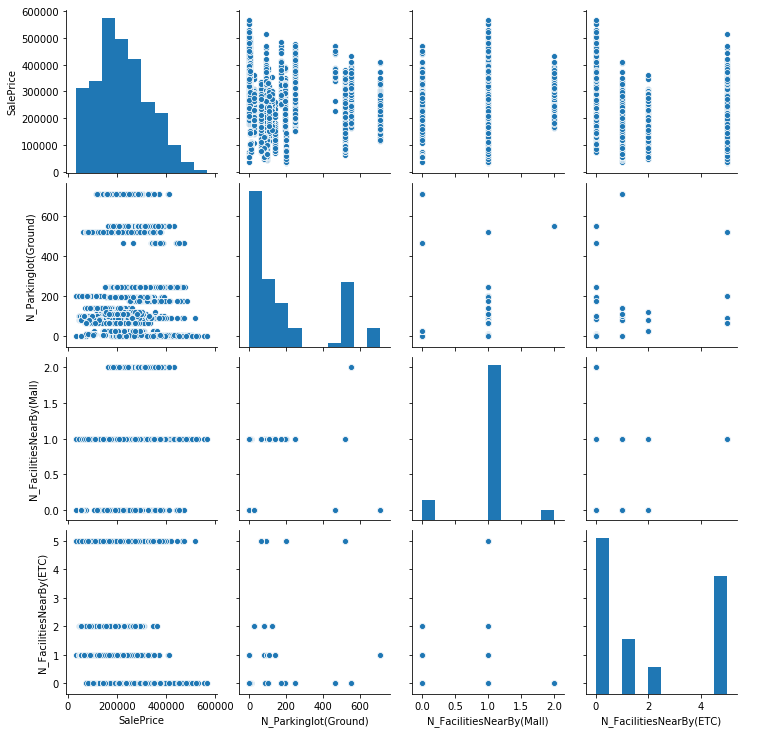

In [29]:
X_train_features3 = X_train[['SalePrice', 'N_Parkinglot(Ground)', 'N_FacilitiesNearBy(Mall)', 'N_FacilitiesNearBy(ETC)']]
sns.pairplot(X_train_features3)

There is a weak positive association between N_FacilitiesNearBy(Mall) and SalePrice, so it may be unlikely that this feature is a useful predictor of SalePrice. There is also a weak positive association between N_Parkinglot(Ground) and Sales Price, which is slightly stronger than the previous association.

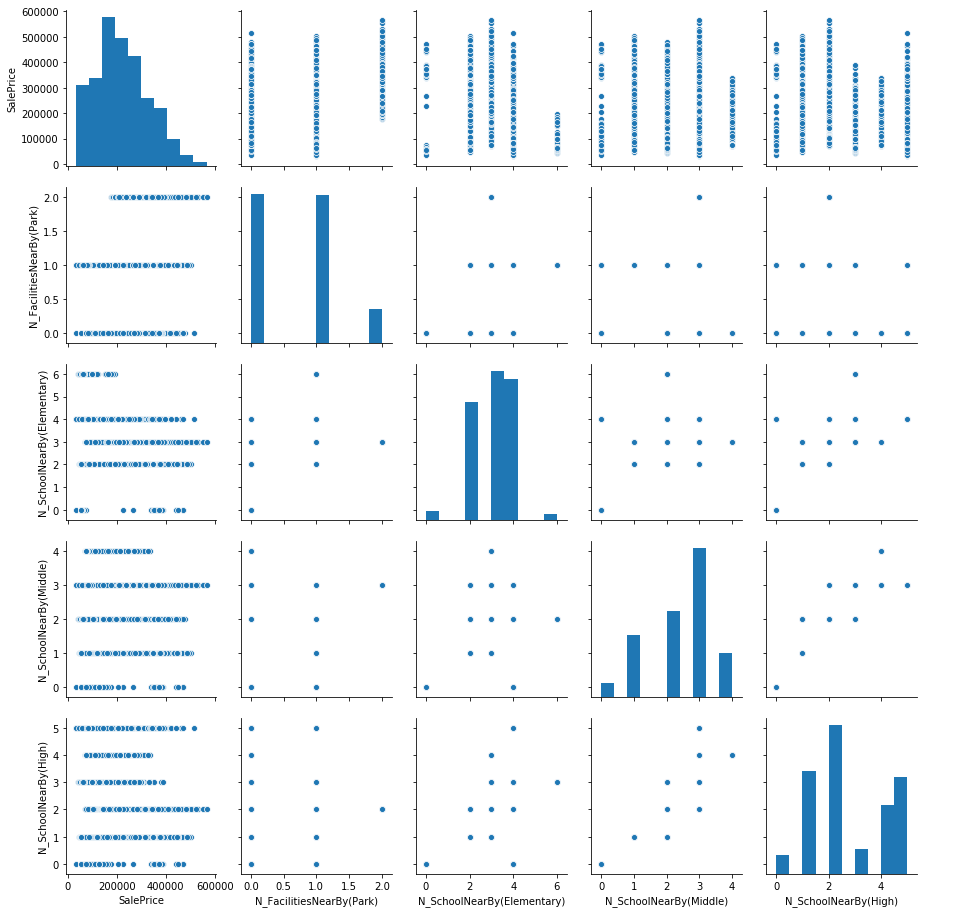

In [30]:
X_train_features4 = X_train[['SalePrice', 'N_FacilitiesNearBy(Park)', 'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(High)']]
sns.pairplot(X_train_features4)

There is no association between SalePrice and N_FacilitiesNearBy(Park), N_SchoolNearBy(Elementary), N_SchoolNearBy(Middle) respectively.

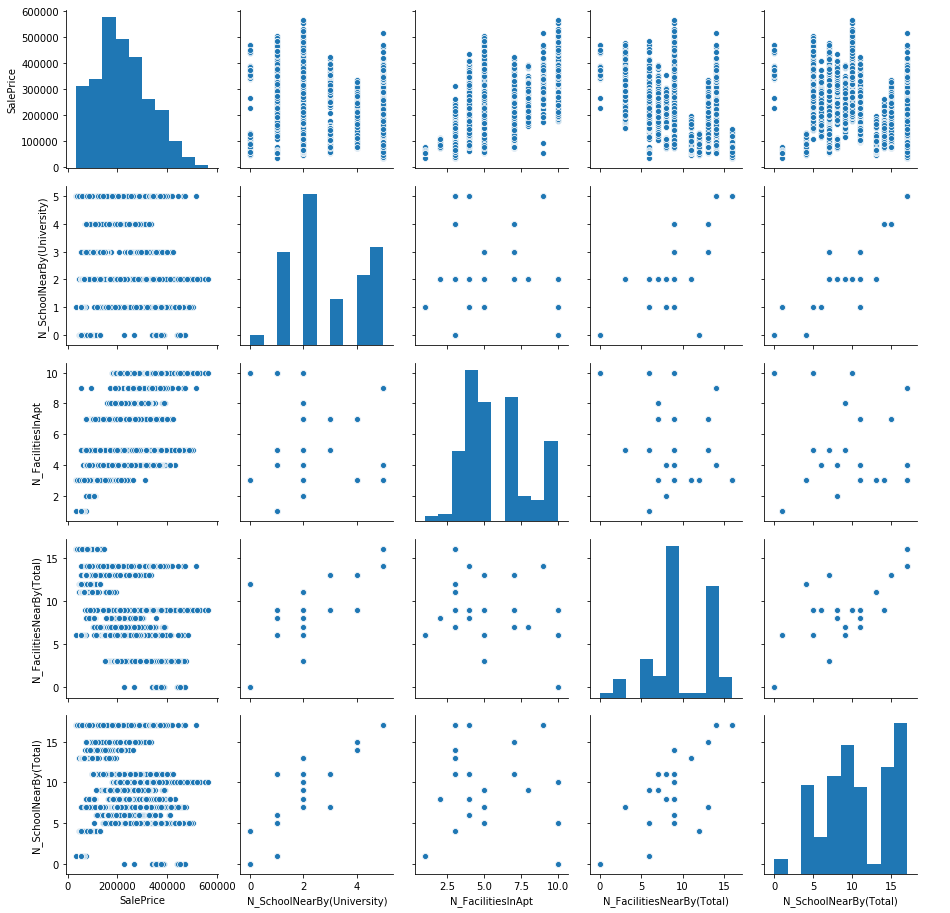

In [31]:
X_train_features5 = X_train[['SalePrice', 'N_SchoolNearBy(University)', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']]
sns.pairplot(X_train_features5)

There appears to be a moderate positive association between N_FacilitiesApt and SalePrice. This means that this feature(N_FacilitiesApt) could be a reliable predictor of the label which is SalePrice.

In short, based on the pairwise plots between the features and the label SalesPrice:
there is a positive linear association between:

SalePrice and Size(sqf), 

SalePrice and Floor

SalePrice and YearBuilt

SalePrice and N_Parkinglot(Ground)

SalePrice and N_FacilitiesInApt

# Model Development Phase

Least Squares Linear Regression

In [77]:
X_train = X_train.reset_index()
X_train

,index,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,...,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),primary key
0,415,230088,2006,2008,10,1149,12,terraced,individual_heating,management_in_trust,...,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0,415.0
1,4382,271681,2006,2015,7,903,4,terraced,individual_heating,management_in_trust,...,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0,4382.0
2,3159,338938,2007,2013,9,1643,14,terraced,individual_heating,management_in_trust,...,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0,3159.0
3,4945,236725,2006,2016,6,636,6,terraced,individual_heating,management_in_trust,...,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0,0.0
4,1730,142477,2005,2011,1,743,16,mixed,individual_heating,management_in_trust,...,5.0,0.0,3.0,4.0,4.0,4.0,7,13.0,15.0,1730.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4413,3772,176548,1993,2014,9,644,11,mixed,individual_heating,management_in_trust,...,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0,3772.0
4414,5191,274336,2009,2016,11,910,2,terraced,individual_heating,management_in_trust,...,2.0,1.0,2.0,1.0,1.0,1.0,5,6.0,5.0,0.0
4415,5226,314159,2007,2016,11,1103,6,terraced,individual_heating,management_in_trust,...,0.0,1.0,2.0,2.0,2.0,2.0,4,9.0,8.0,0.0
4416,5390,271681,2005,2017,3,914,14,mixed,individual_heating,management_in_trust,...,5.0,0.0,3.0,4.0,4.0,4.0,7,13.0,15.0,0.0


In [78]:
X_train.head()

,index,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,...,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),primary key
0,415,230088,2006,2008,10,1149,12,terraced,individual_heating,management_in_trust,...,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0,415.0
1,4382,271681,2006,2015,7,903,4,terraced,individual_heating,management_in_trust,...,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0,4382.0
2,3159,338938,2007,2013,9,1643,14,terraced,individual_heating,management_in_trust,...,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0,3159.0
3,4945,236725,2006,2016,6,636,6,terraced,individual_heating,management_in_trust,...,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0,0.0
4,1730,142477,2005,2011,1,743,16,mixed,individual_heating,management_in_trust,...,5.0,0.0,3.0,4.0,4.0,4.0,7,13.0,15.0,1730.0


In [50]:
def mse(actual, predicted):
    return np.mean((actual-predicted)**2)

In [99]:
import numpy as np
from sklearn.linear_model import LinearRegression
id_column = X_train['index']
price = X_train['SalePrice'] #storing the price column in another variable
X_trained = X_train.loc[:, ['Size(sqf)', 'Floor', 'YearBuilt', 'N_Parkinglot(Ground)', 'N_FacilitiesInApt', 'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',	'N_SchoolNearBy(High)', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']]
y_trained = price
reg = LinearRegression()
reg = reg.fit(X_trained, y_trained)
reg.coef_

array([ 1.67044109e+02,  1.51999711e+03,  2.30943518e+03, -2.33133739e+01,
        8.22023777e+03,  1.74962166e+04, -1.19479421e+04,  5.82664932e+04,
        8.22023777e+03, -3.59255543e+03, -2.12110697e+04])

In [101]:
def cross_validation_regression(k, X_train, y_train, loss_func, label, id_col):
    train_subset = 0
    test_subset = 0
    k_loss_metrics = []
    y_train = y_train.to_frame()
    for i in range(k):
        X_train['id'] = id_col
        y_train['id'] = id_col
        cval_Xtest_subset = X_train.sample(frac = (1/k), replace = False, random_state = i) 
        cval_ytest_subset = y_train.sample(frac=(1/k), replace= False, random_state = i)
        X_train_rest = X_train[np.logical_not(X_train['id'].isin(cval_Xtest_subset['id']))]
        y_train_rest = y_train[np.logical_not(y_train['id'].isin(cval_ytest_subset['id']))]
        X_train = X_train.drop(columns = ['id'])
        lin_reg = LinearRegression()
        y_train_rest = y_train_rest[label]
        lin_reg = lin_reg.fit(X_train_rest, y_train_rest)
        actual = cval_ytest_subset[label]
        predicted = lin_reg.predict(cval_Xtest_subset)
        k_loss_metrics.append(loss_func(actual, predicted))
    print(k_loss_metrics)
    return np.mean(k_loss_metrics)

cval_accuracy = cross_validation_regression(5, X_trained, y_trained, mse, 'SalePrice', id_column)
cval_accuracy

[1770056562.1208377, 1801048082.404198, 1613426918.3053613, 1612085697.8863266, 1704517587.3295968]


1700226969.609264

Finally, we will use our test set to evaluate the performance of our model, using mean squared error.

In [106]:
the_price = X_test['SalePrice'] #storing the price column in another variable
X_tested = X_test.loc[:, ['Size(sqf)', 'Floor', 'YearBuilt', 'N_Parkinglot(Ground)', 'N_FacilitiesInApt', 'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)', 'N_SchoolNearBy(High)', 'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)', 'N_SchoolNearBy(Total)']]
y_tested = the_price
predictions = reg.predict(X_tested)
mse(y_tested, predictions)

2656913013.250428

Text(0.5, 1.0, 'Model')

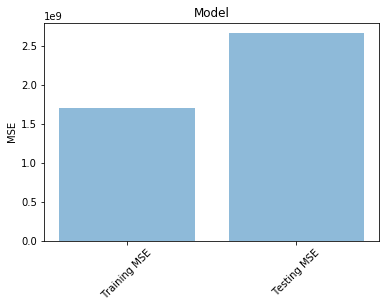

In [107]:
objects = ('Training MSE', 'Testing MSE')
y_pos = np.arange(len(objects))
performance = [cval_accuracy, mse(y_tested, predictions)]
plt.bar(y_pos, performance, align='center', alpha=0.5) 
plt.xticks(y_pos, objects)
plt.xticks(rotation= 45)
plt.ylabel('MSE')
plt.title('Model')

It appears that the testing MSE is larger than the training MSE, which makes sense since any particular model will likely overfit to the training dataset, but would generalize somewhat poorly to unseen data in the test set(to some degree). Particularly, with 11 features being used to predict the response variable(label), which is the house price, with a relatively high model complexity, would capture more noise in the data and be likely to overfit to the training data and not generalize well to unseen data. In such a situation, the model would have low bias(fits well to training data), but high variance(in some cases the accuracy on the test set would be high, and in other cases it may be low). However, this particular least squares regression model seems to generalize reasonably well to the test data for a relatively large number of features, as there isn't much of a difference between the training MSE and the test MSE in the bar chart above.

In conclusion, the least squares regression model received an MSE of 2656913013.250428 on the test set and MSE 1700226969.609264 on the training set with k-fold cross validation accuracy of 5 as k, for predicting house price in dollars. Thus, these models(after further testing with unseen data) will likely be used in a production environment. We must proceed with caution however, as trends in the factors that affect house prices may change over time, so we will need to update the model with new data over time to make these predictions align with the trends. Additionally, investigation into potential model drift over time should be examined, and should be trained with new and updated data.